In [ ]:
#importations

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from google.colab import drive

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
data=pd.read_csv("/content/gdrive/MyDrive/baseVO_all.csv", sep=',', encoding='latin-1')
data=data.iloc[:,1:] #il y a une colonne en trop, celle de l'index, on l'enlève donc
data

,void,dt_annonce,semaine,canal_annonce,canal_vente,prix_annonce,prix_annonce_categ,vente,age_mois,age_mois_categ,...,OPEL,PEUGEOT,RENAULT,SEAT,SKODA,SMART,SUBARU,SUZUKI,TOYOTA,VOLKSWAGEN
0,156190,08/12/2013,0,Particulier,Particulier,8990,"]7500,10000]",0,43,"]24,60]",...,0,0,0,0,0,0,0,0,0,0
1,156190,15/12/2013,1,Particulier,Particulier,8990,"]7500,10000]",0,43,"]24,60]",...,0,0,0,0,0,0,0,0,0,0
2,156190,22/12/2013,2,Particulier,Particulier,8990,"]7500,10000]",0,43,"]24,60]",...,0,0,0,0,0,0,0,0,0,0
3,156190,29/12/2013,3,Particulier,Particulier,8990,"]7500,10000]",0,43,"]24,60]",...,0,0,0,0,0,0,0,0,0,0
4,156190,05/01/2014,4,Particulier,Particulier,8990,"]7500,10000]",0,44,"]24,60]",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848324,119296030148,28/12/2014,0,Particulier,Marchand,6080,"]5000,7500]",1,95,"]60,120]",...,0,1,0,0,0,0,0,0,0,0
848325,119297630148,28/12/2014,0,Particulier,Marchand,5990,"]5000,7500]",1,93,"]60,120]",...,0,0,1,0,0,0,0,0,0,0
848326,119298520625,28/12/2014,0,Particulier,Particulier,11690,"]10000,12500]",1,7,"[0,24]",...,0,1,0,0,0,0,0,0,0,0
848327,119310070603,28/12/2014,0,Particulier,Particulier,11850,"]10000,12500]",1,9,"[0,24]",...,0,1,0,0,0,0,0,0,0,0


In [ ]:
#data=pd.read_csv("C:/Users/Thomas/Downloads/baseVO_all.csv", sep=',', encoding='latin-1')

FileNotFoundError: ignored

In [ ]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [ ]:
data_caract=data[["void","prix_neuf_ttc", "km", "age_mois", "boite_auto", "millesime", "cylindre", "consommation", "diesel", "capacite"]].dropna().groupby("void").agg("last")

scaler = preprocessing.StandardScaler()
X_std=scaler.fit_transform(data_caract)
data_caract_std = pd.DataFrame(X_std, index=data_caract.index, columns=data_caract.columns)

data_caract_std #attention, on a perdu 62 lignes qui étaient des Nan -> autant les enlever dès le début

,prix_neuf_ttc,km,age_mois,boite_auto,millesime,cylindre,consommation,diesel,capacite
void,,,,,,,,,
156190,-0.185366,1.144916,0.574512,-0.107719,-0.659821,0.817187,0.216275,0.631473,-0.963718
326190,-0.151095,0.322856,1.184937,-0.107719,-1.208568,-0.198722,-0.142582,0.631473,-0.864849
336190,-1.778978,-1.021884,-0.458516,-0.107719,0.437674,0.196354,0.575134,0.631473,-0.963718
703100,-0.543500,0.533528,0.621468,-0.107719,-0.659821,-0.048217,-0.262201,0.631473,-0.294718
826190,-1.247774,0.054750,0.997114,-0.107719,-1.208568,-1.177004,1.412468,-1.583599,-1.081505
...,...,...,...,...,...,...,...,...,...
119296030148,-0.322451,1.469795,2.875346,-0.107719,-2.306064,0.986505,2.967520,-1.583599,-1.267237
119297630148,-0.390993,2.288098,2.781435,-0.107719,-2.306064,1.055486,2.608662,-1.583599,-1.267237
119298520625,-0.545214,-1.037190,-1.256765,-0.107719,1.535170,-1.446659,-0.022963,-1.583599,-0.543867


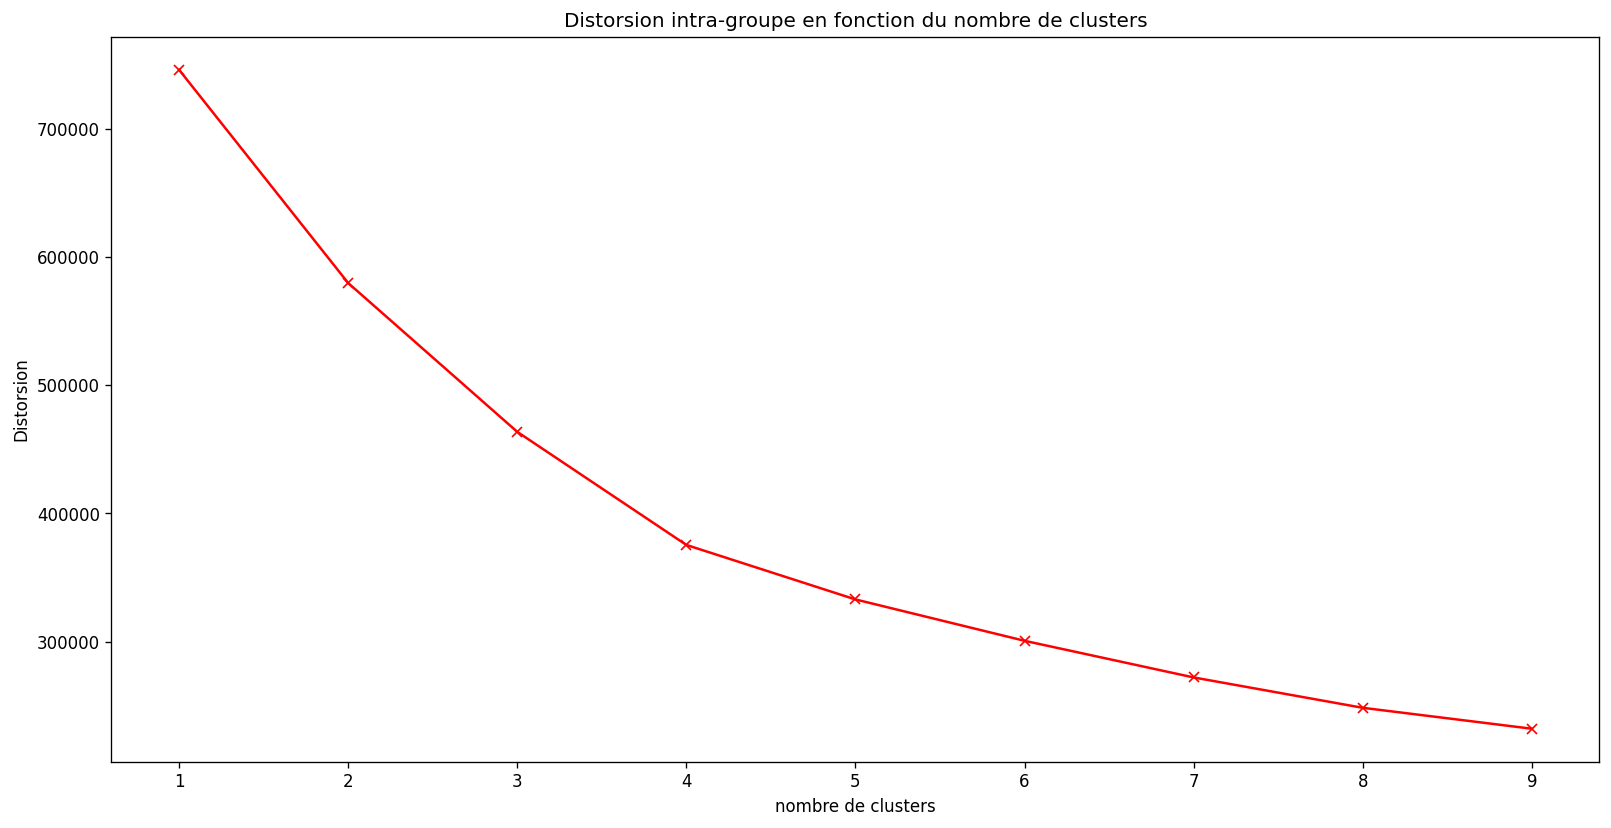

In [ ]:
# visualisation de la distorsion pour détrminer le nombre optimal de clusters -> 4 clusters

X=data_caract_std.reset_index().drop("void", axis=1).round(2)
distorsions=[]

K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)

    kmeanModel.fit(X)
    distorsions.append(kmeanModel.inertia_)


plt.figure(figsize=(16,8), dpi=120)
plt.plot(K, distorsions, 'bx-', c="r")
plt.xlabel('nombre de clusters')
plt.ylabel('Distorsion')
plt.title('Distorsion intra-groupe en fonction du nombre de clusters')
plt.show()

In [ ]:
#clustering avec les KNN
#on a vu que 4 était le nombre de clusters optimal, on va donc appliquer l'algo 

KNN4=KMeans(n_clusters=4)
KNN4.fit(X)
data_caract["cluster"]=KNN4.predict(X)

In [ ]:
data_caract.groupby("cluster").mean().round(2)

,prix_neuf_ttc,km,age_mois,boite_auto,millesime,cylindre,consommation,diesel,capacite
cluster,,,,,,,,,
0,16069.22,23325.68,26.14,0.0,2011.88,1272.19,5.38,0.00,3.12
1,21224.14,33672.75,39.34,1.0,2010.74,1609.21,6.60,0.14,3.14
2,17392.85,75652.78,60.50,0.0,2008.94,1466.33,4.68,0.85,3.16
3,18742.03,30903.42,23.08,0.0,2012.09,1481.06,3.98,1.00,3.08


In [ ]:
data_caract.groupby("cluster").size()

cluster
0    19446
1      951
2    21676
3    40837
dtype: int64

In [ ]:
data_caract[data_caract["boite_auto"]==1] #le cluster 1 est celui des boites auto

,prix_neuf_ttc,km,age_mois,boite_auto,millesime,cylindre,consommation,diesel,capacite,cluster
void,,,,,,,,,,
1853100,19600.0,45063,33,1,2011,1598.0,6.6,0,4.303797,1
11583927,25000.0,14792,55,1,2010,1598.0,6.4,0,4.117647,1
12293350,19600.0,14950,30,1,2011,1598.0,6.6,0,2.226149,1
14534053,18900.0,40851,50,1,2010,1598.0,6.9,0,2.412747,1
24262056,19150.0,10208,35,1,2011,1598.0,7.5,0,2.708333,1
...,...,...,...,...,...,...,...,...,...,...
117387032962,29300.0,37900,37,1,2011,1995.0,5.6,1,4.095942,1
117703850024,27500.0,25115,23,1,2013,1995.0,5.6,1,10.000000,1
118526870931,18950.0,30809,72,1,2008,1598.0,7.0,0,1.217320,1


Interprétation des clusters \

0 : voitures essence, assez récentes, assez consommatrices \
1 : cluster des véhicules très anciens \
2 : véhicules diesels, bon rapport cylindree/conso \
3 : cluster des boites auto (souvent haut de gamme) \

In [ ]:
# ACP pour visualiser la pertinence des clusters

from sklearn.decomposition import PCA
model_acp=PCA(n_components=2)

In [ ]:
values_acp=model_acp.fit_transform(X.values) # appliquer la méthode .values à X_bis permet de transformer le datset en liste de vecteurs
values_acp

array([[ 1.27170794,  1.01529605],
       [ 1.43142707,  0.56956201],
       [-0.64964816, -0.80101916],
       ...,
       [-1.93752044, -2.36180089],
       [-1.66714798, -2.40357298],
       [ 0.7703042 ,  0.77823407]])

In [ ]:
#sns.set()

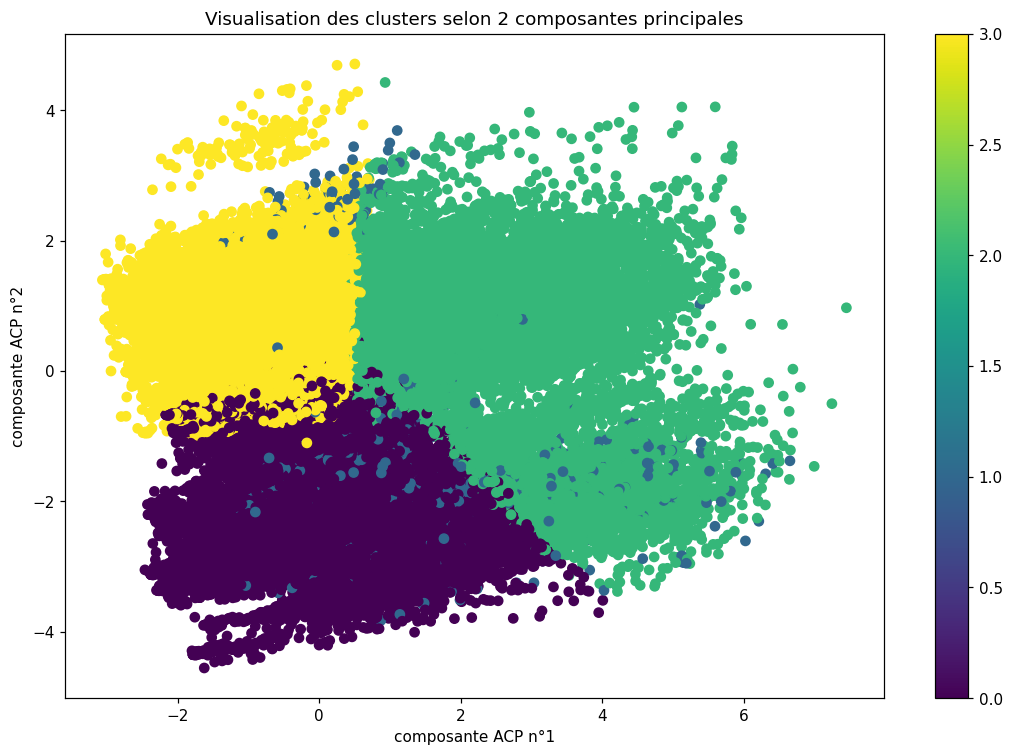

In [ ]:
#visualisation

plt.figure(figsize=[12,8], dpi=110)
plt.scatter(values_acp[:,0], values_acp[:,1], c=data_caract["cluster"], label=data_caract["cluster"])
#plt.legend(labels=X_bis["cluster"])
plt.xlabel("composante ACP n°1")
plt.ylabel("composante ACP n°2")
plt.colorbar()
plt.title("Visualisation des clusters selon 2 composantes principales")
plt.show()

In [ ]:
data_caract.reset_index().to_csv("Data_all_clusters.csv", index=False)

In [ ]:
data_caract.reset_index()

,void,prix_neuf_ttc,km,age_mois,boite_auto,millesime,cylindre,consommation,diesel,capacite,cluster
0,156190,17250.0,73769,46,0,2010,1560.0,4.7,1,1.549296,2
1,326190,17350.0,50138,59,0,2009,1398.0,4.4,1,1.709844,2
2,336190,12600.0,11482,24,0,2012,1461.0,5.0,1,1.549296,3
3,703100,16205.0,56194,47,0,2010,1422.0,4.3,1,2.635659,2
4,826190,14150.0,42431,55,0,2009,1242.0,5.7,0,1.358025,0
...,...,...,...,...,...,...,...,...,...,...,...
82905,119296030148,16850.0,83108,95,0,2007,1587.0,7.0,0,1.056423,2
82906,119297630148,16650.0,106631,93,0,2007,1598.0,6.7,0,1.056423,2
82907,119298520625,16200.0,11042,7,0,2014,1199.0,4.5,0,2.231076,0
82908,119310070603,15250.0,20507,9,0,2014,1199.0,4.5,0,3.092106,0
